Linear Regression on Desharnais Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load CSV
df = pd.read_csv("/content/drive/MyDrive/Datasets/desharnais(days).csv")
df = df.drop(columns=['id'])
# Define input features and target
X = df.drop(columns=['Effort', 'EffortInDays']) # All columns except the target
y = df['EffortInDays']


In [4]:
df.isnull().sum()

,0
Project,0
TeamExp,0
ManagerExp,0
YearEnd,0
Length,0
Effort,0
Transactions,0
Entities,0
PointsNonAdjust,0
Adjustment,0


In [5]:
df.corr()

,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language,EffortInDays
Project,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475,0.126153
TeamExp,-0.006007,1.000000,0.424687,-0.210335,0.143948,0.119529,0.103768,0.256608,0.203805,0.235629,0.222884,-0.079112,0.119529
ManagerExp,0.214294,0.424687,1.000000,-0.011519,0.211324,0.158303,0.138146,0.206644,0.207748,-0.066821,0.187399,0.205521,0.158303
YearEnd,0.096486,-0.210335,-0.011519,1.000000,-0.095027,-0.048367,0.034331,0.001686,0.028234,-0.056743,0.012106,0.342233,-0.048367
Length,0.255187,0.143948,0.211324,-0.095027,1.000000,0.693280,0.620711,0.483504,0.723849,0.266086,0.714092,-0.023810,0.693280
Effort,0.126153,0.119529,0.158303,-0.048367,0.693280,1.000000,0.581881,0.510328,0.705449,0.463865,0.738271,-0.261942,1.000000
Transactions,0.265891,0.103768,0.138146,0.034331,0.620711,0.581881,1.000000,0.185041,0.886419,0.341906,0.880923,0.136778,0.581881
Entities,0.028787,0.256608,0.206644,0.001686,0.483504,0.510328,0.185041,1.000000,0.618913,0.234747,0.598401,-0.056439,0.510328
PointsNonAdjust,0.226076,0.203805,0.207748,0.028234,0.723849,0.705449,0.886419,0.618913,1.000000,0.383842,0.985945,0.082737,0.705449
Adjustment,-0.207774,0.235629,-0.066821,-0.056743,0.266086,0.463865,0.341906,0.234747,0.383842,1.000000,0.513197,-0.199167,0.463865


<Axes: title={'center': 'Pearson Correlation of Features'}>

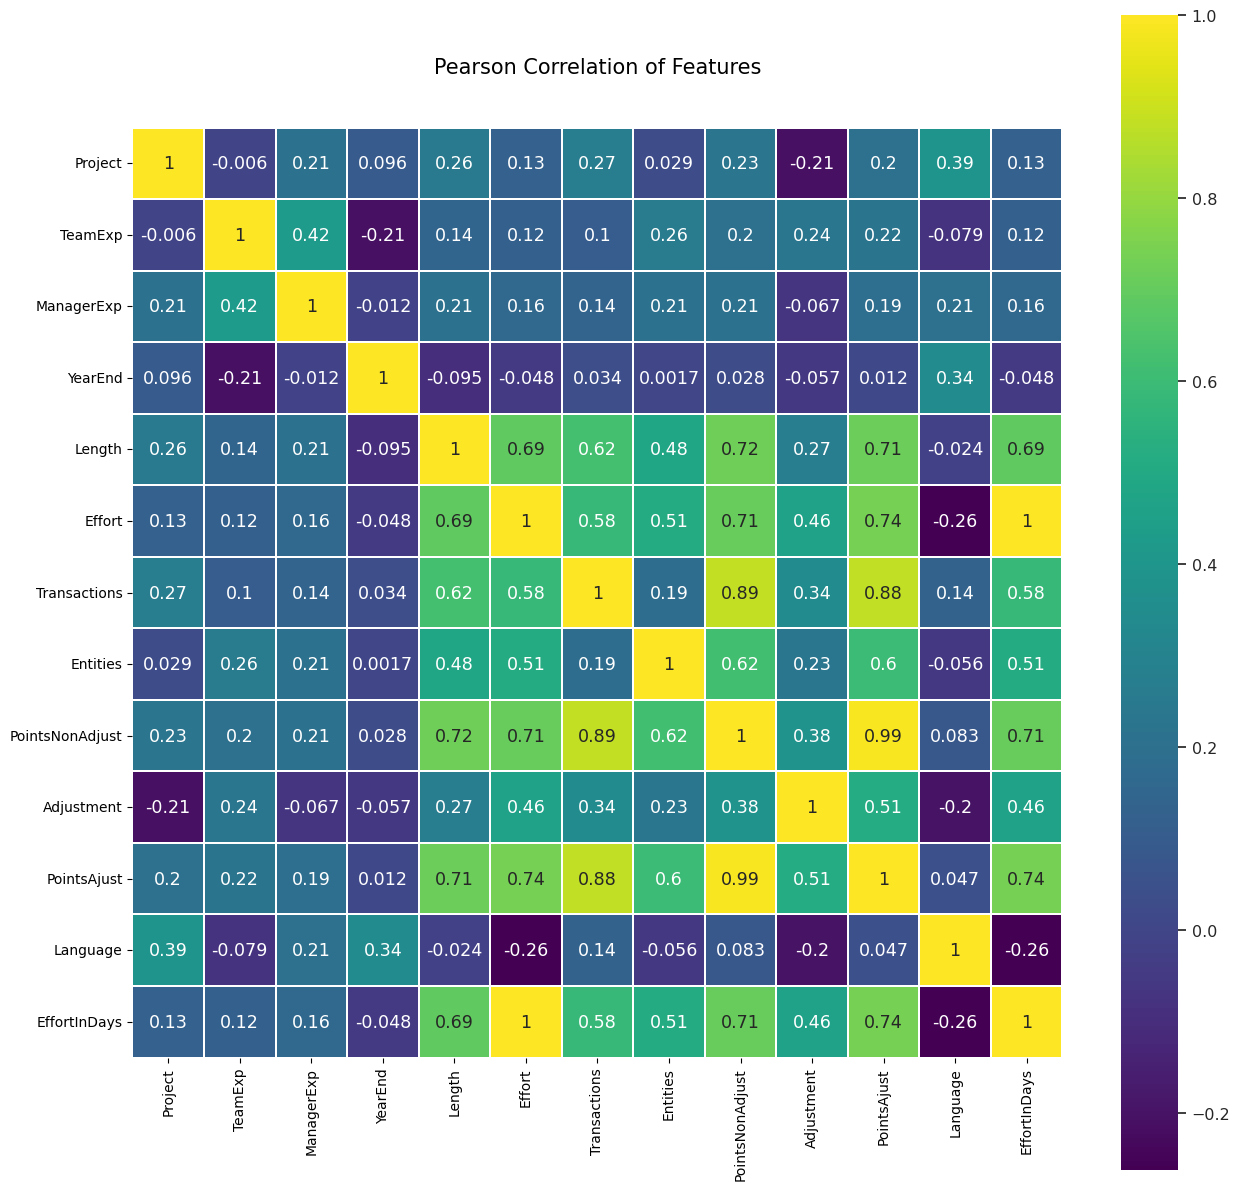

In [6]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

In [7]:
mutual_info = mutual_info_regression(X, y)
mutual_info

array([0.07957256, 0.        , 0.09920103, 0.        , 0.20299036,
       0.16835851, 0.26180435, 0.35730984, 0.19006013, 0.47581158,
       0.18492589])

In [8]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

,0
PointsAjust,0.475812
PointsNonAdjust,0.357310
Entities,0.261804
Length,0.202990
Adjustment,0.190060
Language,0.184926
Transactions,0.168359
ManagerExp,0.099201
Project,0.079573
TeamExp,0.000000


<Axes: >

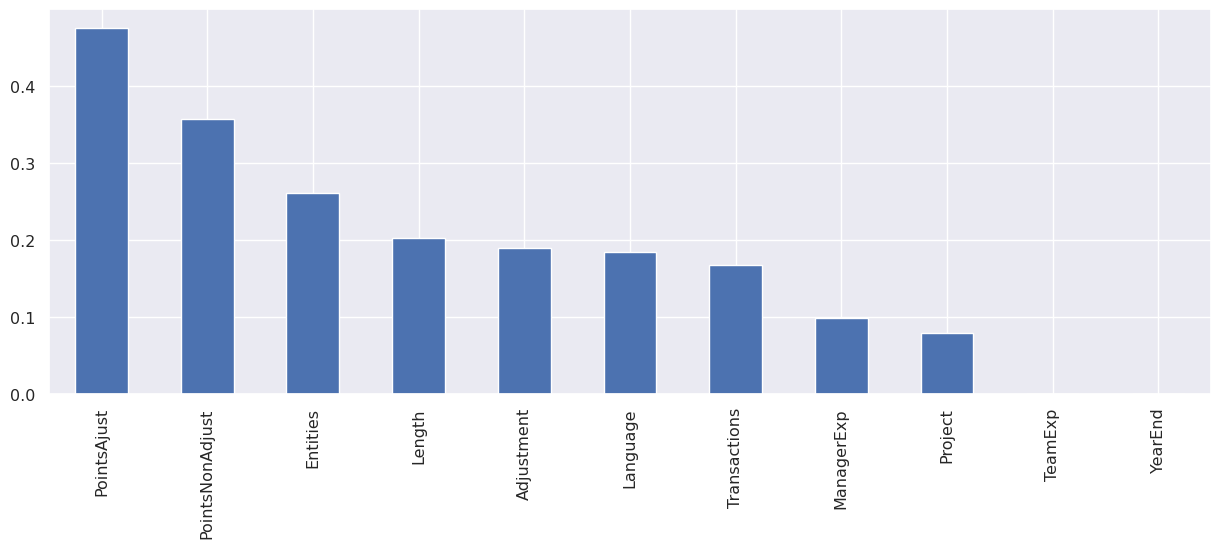

In [9]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [10]:
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=65)
selected_top_columns.fit(X, y)
X.columns[selected_top_columns.get_support()]

Index(['Length', 'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment',
       'PointsAjust', 'Language'],
      dtype='object')

Full dataset without scaling

In [11]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Full dataset with scaling

In [12]:
scaler = StandardScaler()
X2_train = scaler.fit_transform(X_train)
X2_test = scaler.transform(X_test)
y2_train = y_train
y2_test = y_test

Feature selected dataset without scaling

In [13]:
X3 = df[['Length', 'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment','PointsAjust', 'Language']]
y3 = df['EffortInDays']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

Feature selected dataset with scaling

In [14]:
X4_train = scaler.fit_transform(X3_train)
X4_test = scaler.transform(X3_test)
y4_train = y3_train
y4_test = y3_test

**Linear Regression**

Model Training

In [15]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

lr3 = LinearRegression()
lr3.fit(X3_train,y3_train)

LinearRegression()

Predictions

In [16]:
lr1_pred = lr1.predict(X_test)
lr3_pred = lr3.predict(X3_test)

Evaluation


All features no scaling:-
Root mean Squared Error: 80.9964
Mean Absolute Eroor: 59.7939
R² Score: 0.7038

Selected features no scaling:-
Root mean Squared Error: 85.0338
Mean Absolute Eroor: 60.6221
R² Score: 0.6736


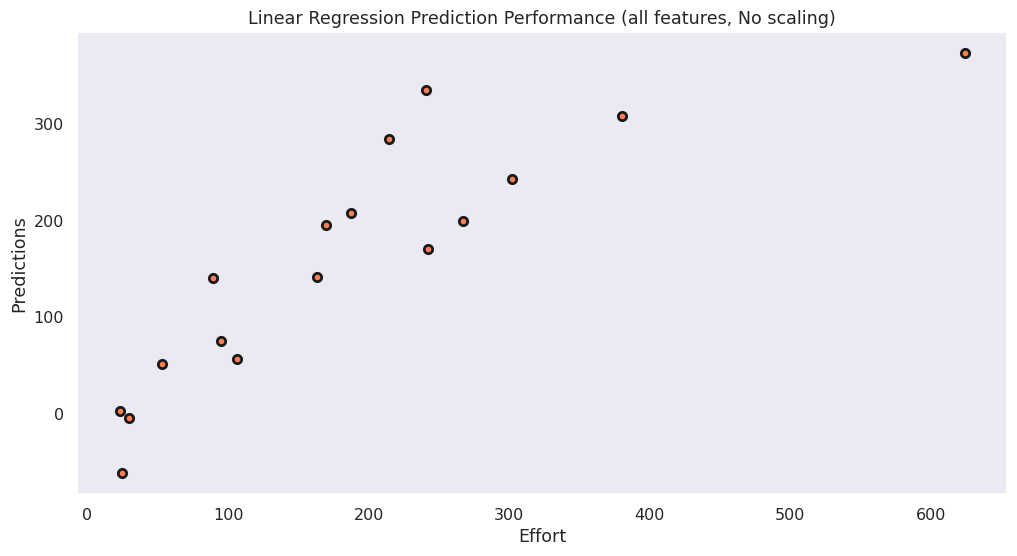

In [17]:
rmse_lr1 = root_mean_squared_error(y_test, lr1_pred)
r2_lr1 = r2_score(y_test, lr1_pred)
mae_lr1 = mean_absolute_error(y_test, lr1_pred)

print("\nAll features no scaling:-")
print(f"Root mean Squared Error: {rmse_lr1:.4f}")
print(f"Mean Absolute Eroor: {mae_lr1:.4f}")
print(f"R² Score: {r2_lr1:.4f}")

rmse_lr3 = root_mean_squared_error(y_test, lr3_pred)
r2_lr3 = r2_score(y_test, lr3_pred)
mae_lr3 = mean_absolute_error(y_test, lr3_pred)

print("\nSelected features no scaling:-")
print(f"Root mean Squared Error: {rmse_lr3:.4f}")
print(f"Mean Absolute Eroor: {mae_lr3:.4f}")
print(f"R² Score: {r2_lr3:.4f}")

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,lr1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort')
plt.ylabel('Predictions')
plt.title('Linear Regression Prediction Performance (all features, No scaling)')
plt.grid()

**SVM**

Model training

In [18]:
svm1 = SVR(kernel='linear')
svm1.fit(X_train,y_train)

svm3 = SVR(kernel='linear')
svm3.fit(X3_train,y3_train)

SVR(kernel='linear')

Predictions

In [19]:
svm1_pred = svm1.predict(X_test)
svm3_pred = svm3.predict(X3_test)

Evaluations


All features no scaling:-
Root mean Squared Error: 110.8860
Mean Absolute Eroor: 78.6721
R² Score: 0.4449

Selected features no scaling:-
Root mean Squared Error: 107.9222
Mean Absolute Eroor: 68.5720
R² Score: 0.4742


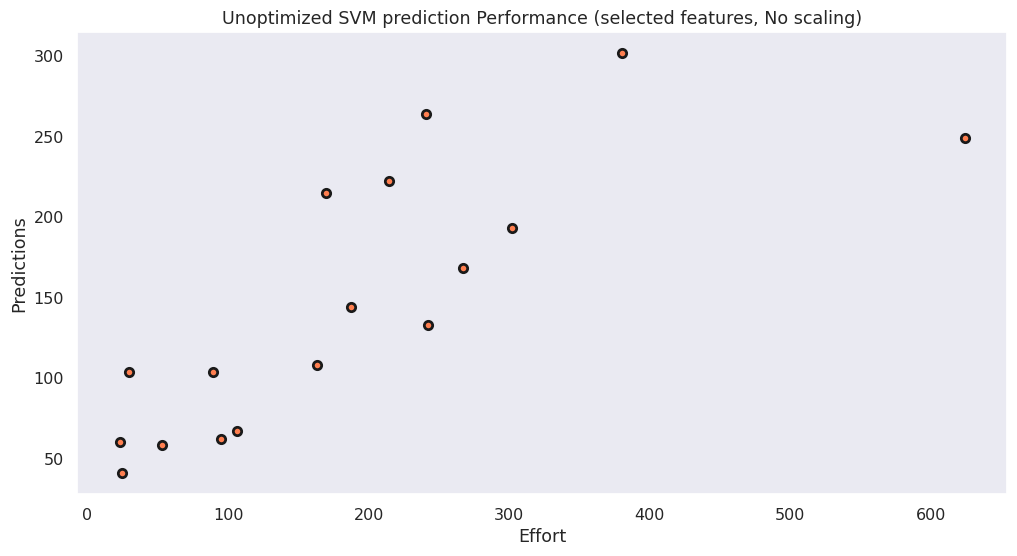

In [20]:
rmse_svm1 = root_mean_squared_error(y_test, svm1_pred)
r2_svm1 = r2_score(y_test, svm1_pred)
mae_svm1 = mean_absolute_error(y_test,svm1_pred)

print("\nAll features no scaling:-")
print(f"Root mean Squared Error: {rmse_svm1:.4f}")
print(f"Mean Absolute Eroor: {mae_svm1:.4f}")
print(f"R² Score: {r2_svm1:.4f}")

rmse_svm3 = root_mean_squared_error(y_test, svm3_pred)
r2_svm3 = r2_score(y_test, svm3_pred)
mae_svm3 = mean_absolute_error(y_test, svm3_pred)

print("\nSelected features no scaling:-")
print(f"Root mean Squared Error: {rmse_svm3:.4f}")
print(f"Mean Absolute Eroor: {mae_svm3:.4f}")
print(f"R² Score: {r2_svm3:.4f}")

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,svm3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort')
plt.ylabel('Predictions')
plt.title('Unoptimized SVM prediction Performance (selected features, No scaling)')
plt.grid()
plt.show()

**Optimising SVM**

In [21]:
param_grid = {'C':[1, 10, 100],
             'kernel':['linear'],
             'gamma':('auto', 'scale')}
grid = GridSearchCV(SVR(), param_grid, verbose=3, n_jobs=-1)

In [22]:
grid.fit(X3_train, y3_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': ('auto', 'scale'),
                         'kernel': ['linear']},
             verbose=3)

In [23]:
grid.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'linear'}

In [24]:
grid.best_estimator_

SVR(C=100, gamma='auto', kernel='linear')

In [25]:
grid_predictions = grid.predict(X3_test)

Root mean Squared Error: 98.5231
Mean Absolute Eroor: 63.3638
R² Score: 0.5618


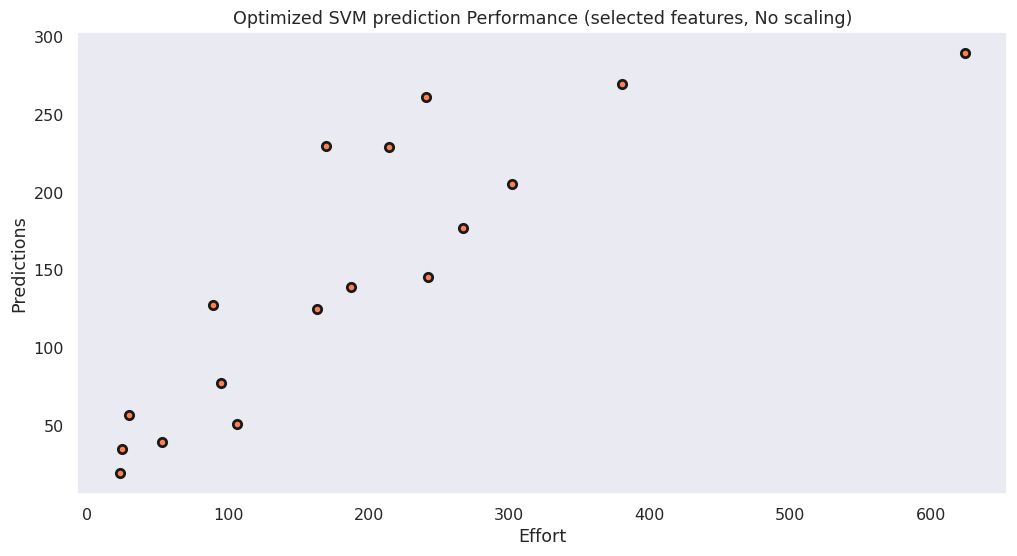

In [26]:
rmse_svm3 = root_mean_squared_error(y_test, grid_predictions)
r2_svm3 = r2_score(y_test, grid_predictions)
mae_svm3 = mean_absolute_error(y_test, grid_predictions)

#print("\nSelected features no scaling:-")
print(f"Root mean Squared Error: {rmse_svm3:.4f}")
print(f"Mean Absolute Eroor: {mae_svm3:.4f}")
print(f"R² Score: {r2_svm3:.4f}")

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort')
plt.ylabel('Predictions')
plt.title('Optimized SVM prediction Performance (selected features, No scaling)')
plt.grid()
plt.show()

**Random Forest Regression**

Model training

In [27]:
rf1 = RandomForestRegressor()
rf1.fit(X_train, y_train)

rf2 = RandomForestRegressor()
rf2.fit(X2_train, y2_train)

rf3 = RandomForestRegressor()
rf3.fit(X3_train, y3_train)

rf4 = RandomForestRegressor()
rf4.fit(X4_train, y4_train)

RandomForestRegressor()

Predictions

In [28]:
rf1_pred = rf1.predict(X_test)
rf2_pred = rf2.predict(X2_test)
rf3_pred = rf3.predict(X3_test)
rf4_pred = rf4.predict(X4_test)

Evaluation


All features no scaling:-
Root mean Squared Error: 91.5735
Mean Absolute Eroor: 71.1923
R² Score: 0.6214

All features with scaling:-
Root mean Squared Error: 93.8539
Mean Absolute Eroor: 74.5111
R² Score: 0.6023

Selected features no scaling:-
Root mean Squared Error: 91.5959
Mean Absolute Eroor: 72.6294
R² Score: 0.6212

Selected features with scaling:-
Root mean Squared Error: 95.4183
Mean Absolute Eroor: 71.4063
R² Score: 0.5890


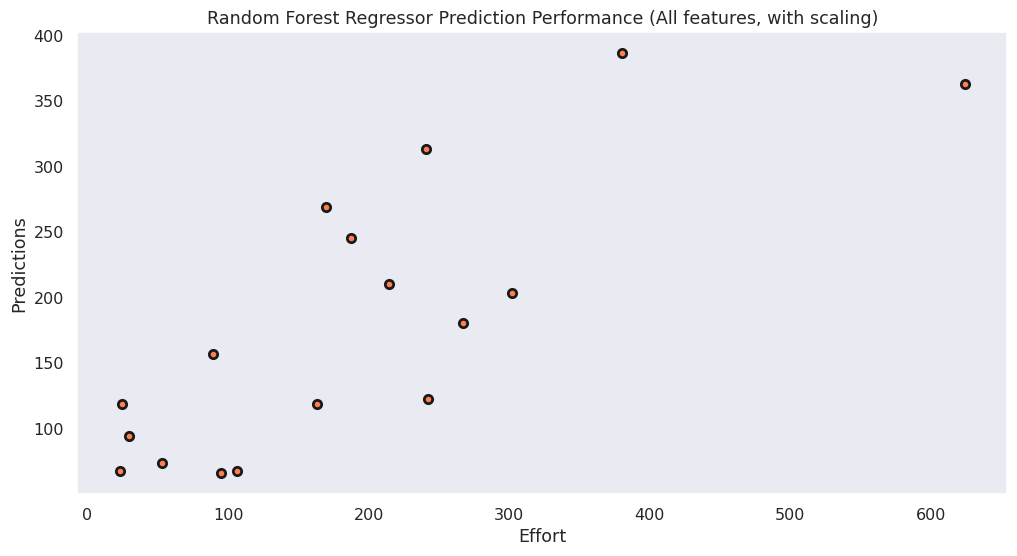

In [29]:
rmse_rf1 = root_mean_squared_error(y_test, rf1_pred)
r2_rf1 = r2_score(y_test, rf1_pred)
mae_rf1 = mean_absolute_error(y_test,rf1_pred)

print("\nAll features no scaling:-")
print(f"Root mean Squared Error: {rmse_rf1:.4f}")
print(f"Mean Absolute Eroor: {mae_rf1:.4f}")
print(f"R² Score: {r2_rf1:.4f}")

rmse_rf2 = root_mean_squared_error(y2_test, rf2_pred)
r2_rf2 = r2_score(y2_test, rf2_pred)
mae_rf2 = mean_absolute_error(y2_test,rf2_pred)

print("\nAll features with scaling:-")
print(f"Root mean Squared Error: {rmse_rf2:.4f}")
print(f"Mean Absolute Eroor: {mae_rf2:.4f}")
print(f"R² Score: {r2_rf2:.4f}")

rmse_rf3 = root_mean_squared_error(y3_test, rf3_pred)
r2_rf3 = r2_score(y3_test, rf3_pred)
mae_rf3 = mean_absolute_error(y3_test,rf3_pred)

print("\nSelected features no scaling:-")
print(f"Root mean Squared Error: {rmse_rf3:.4f}")
print(f"Mean Absolute Eroor: {mae_rf3:.4f}")
print(f"R² Score: {r2_rf3:.4f}")

rmse_rf4 = root_mean_squared_error(y4_test, rf4_pred)
r2_rf4 = r2_score(y4_test, rf4_pred)
mae_rf4 = mean_absolute_error(y4_test,rf4_pred)

print("\nSelected features with scaling:-")
print(f"Root mean Squared Error: {rmse_rf4:.4f}")
print(f"Mean Absolute Eroor: {mae_rf4:.4f}")
print(f"R² Score: {r2_rf4:.4f}")

fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,rf1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort')
plt.ylabel('Predictions')
plt.title('Random Forest Regressor Prediction Performance (All features, with scaling)')
plt.grid()
plt.show()

Optimising RF Regressor

In [30]:
rf_param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'bootstrap': [False, True],
    'n_estimators': [100, 500, 1000],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(RandomForestRegressor(), rf_param_grid, verbose=3, n_jobs=-1)


In [31]:
rf_grid.fit(X2_train, y2_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 500, 1000]},
             verbose=3)

In [32]:
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'absolute_error',
 'max_features': 'sqrt',
 'n_estimators': 500}

In [33]:
rf_grid.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=500)

In [34]:
rf_grid_predictions = rf_grid.predict(X2_test)

In [35]:
rmse_rf2 = root_mean_squared_error(y2_test, rf_grid_predictions)
r2_rf2 = r2_score(y2_test, rf_grid_predictions)
mae_rf2 = mean_absolute_error(y2_test,rf_grid_predictions)

#print("\nAll features with scaling:-")
print(f"Root mean Squared Error: {rmse_rf2:.4f}")
print(f"Mean Absolute Eroor: {mae_rf2:.4f}")
print(f"R² Score: {r2_rf2:.4f}")


Root mean Squared Error: 90.9522
Mean Absolute Eroor: 69.1454
R² Score: 0.6265


**KNN**

Model training

In [36]:
kn2 = KNeighborsRegressor()
kn2.fit(X2_train, y2_train)

kn4 = KNeighborsRegressor()
kn4.fit(X4_train, y4_train)

KNeighborsRegressor()

Predictions

In [37]:
kn2_pred = kn2.predict(X2_test)
kn4_pred = kn4.predict(X4_test)

Evaluations


All features with scaling:-
Root mean Squared Error: 107.1019
Mean Absolute Eroor: 67.6113
R² Score: 0.4821

Selected features with scaling:-
Root mean Squared Error: 121.0379
Mean Absolute Eroor: 72.8696
R² Score: 0.3386


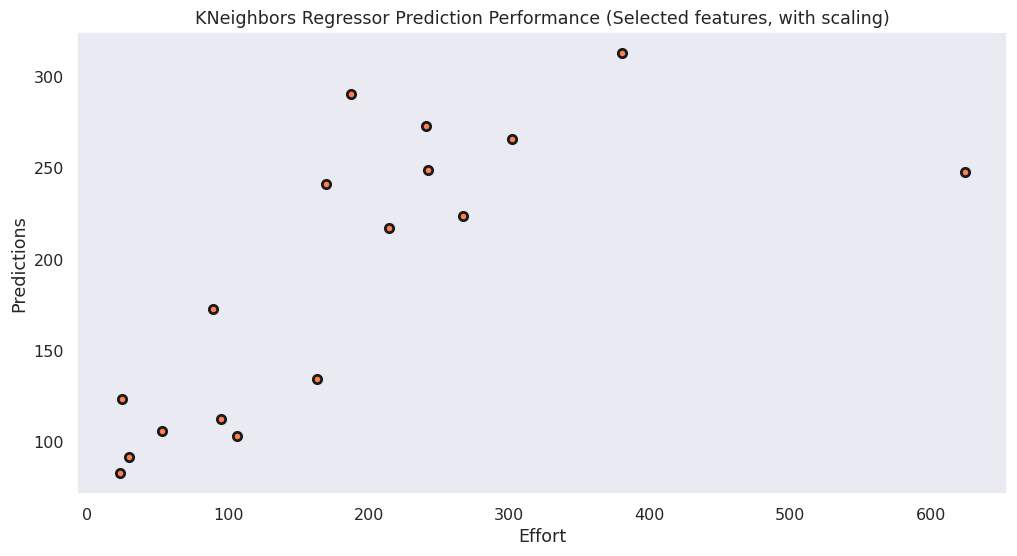

In [38]:
rmse_kn2 = root_mean_squared_error(y2_test, kn2_pred)
r2_kn2 = r2_score(y2_test, kn2_pred)
mae_kn2 = mean_absolute_error(y2_test,kn2_pred)

print("\nAll features with scaling:-")
print(f"Root mean Squared Error: {rmse_kn2:.4f}")
print(f"Mean Absolute Eroor: {mae_kn2:.4f}")
print(f"R² Score: {r2_kn2:.4f}")

rmse_kn4 = root_mean_squared_error(y4_test,kn4_pred)
r2_kn4 = r2_score(y4_test, kn4_pred)
mae_kn4 = mean_absolute_error(y4_test,kn4_pred)

print("\nSelected features with scaling:-")
print(f"Root mean Squared Error: {rmse_kn4:.4f}")
print(f"Mean Absolute Eroor: {mae_kn4:.4f}")
print(f"R² Score: {r2_kn4:.4f}")

fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,kn2_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort')
plt.ylabel('Predictions')
plt.title('KNeighbors Regressor Prediction Performance (Selected features, with scaling)')
plt.grid()
plt.show()

Lasso Regression

Model Training

In [40]:
lsr1 = linear_model.Lasso(max_iter=1500)
lsr1.fit(X_train, y_train)

lsr3 = linear_model.Lasso(max_iter=1500)
lsr3.fit(X3_train, y3_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.927e+03, tolerance: 2.326e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.045e+03, tolerance: 2.326e+02
  model = cd_fast.enet_coordinate_descent(


Lasso(max_iter=1500)

Predictions

In [41]:
lsr1_pred = lsr1.predict(X_test)
lsr3_pred = lsr3.predict(X3_test)

Evaluation


All features with scaling:-
Root mean Squared Error: 81.0214
Mean Absolute Eroor: 59.2344
R² Score: 0.7036

Selected features with scaling:-
Root mean Squared Error: 84.9030
Mean Absolute Eroor: 60.0664
R² Score: 0.6746


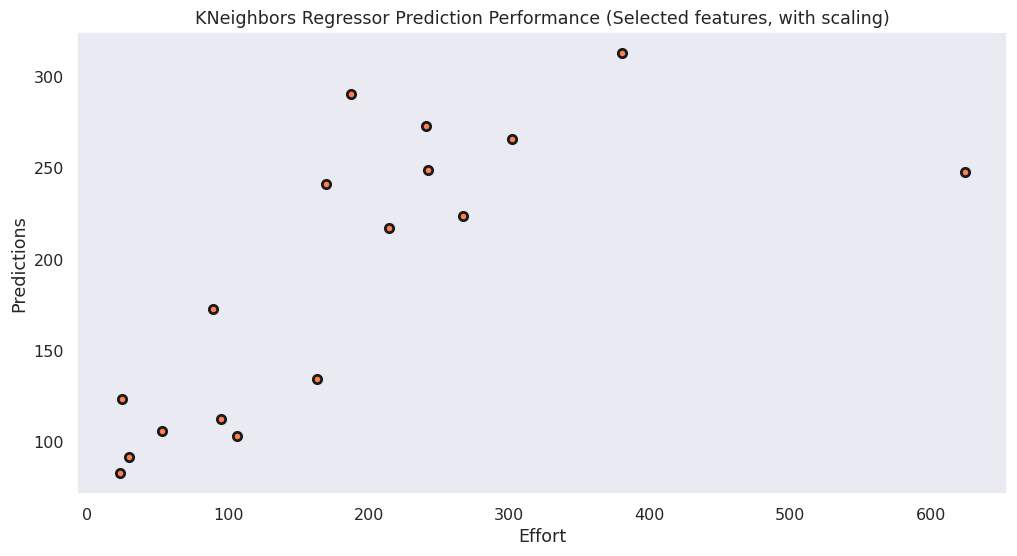

In [43]:
rmse_lsr1 = root_mean_squared_error(y_test, lsr1_pred)
r2_lsr1 = r2_score(y_test, lsr1_pred)
mae_lsr1 = mean_absolute_error(y_test,lsr1_pred)

print("\nAll features with scaling:-")
print(f"Root mean Squared Error: {rmse_lsr1:.4f}")
print(f"Mean Absolute Eroor: {mae_lsr1:.4f}")
print(f"R² Score: {r2_lsr1:.4f}")

rmse_lsr3 = root_mean_squared_error(y3_test,lsr3_pred)
r2_lsr3 = r2_score(y3_test, lsr3_pred)
mae_lsr3 = mean_absolute_error(y3_test,lsr3_pred)

print("\nSelected features with scaling:-")
print(f"Root mean Squared Error: {rmse_lsr3:.4f}")
print(f"Mean Absolute Eroor: {mae_lsr3:.4f}")
print(f"R² Score: {r2_lsr3:.4f}")

fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,kn2_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Effort')
plt.ylabel('Predictions')
plt.title('KNeighbors Regressor Prediction Performance (Selected features, with scaling)')
plt.grid()
plt.show()

Ridge Regression

Model Training

In [44]:
rr1 = Ridge()
rr1.fit(X_train, y_train)

rr2 = Ridge()
rr2.fit(X2_train, y2_train)

rr3 = Ridge()
rr3.fit(X3_train, y3_train)

rr4 = Ridge()
rr4.fit(X4_train, y4_train)


Ridge()

Predictions

In [45]:
rr1_pred = rr1.predict(X_test)
rr2_pred = rr2.predict(X2_test)
rr3_pred = rr3.predict(X3_test)
rr4_pred = rr4.predict(X4_test)

Evaluation

In [48]:
rmse_rr1 = root_mean_squared_error(y_test, rr1_pred)
r2_rr1 = r2_score(y_test, rr1_pred)
mae_rr1 = mean_absolute_error(y_test,rr1_pred)

print("\nAll features with scaling:-")
print(f"Root mean Squared Error: {rmse_rr1:.4f}")
print(f"Mean Absolute Eroor: {mae_rr1:.4f}")
print(f"R² Score: {r2_rr1:.4f}")

rmse_rr2 = root_mean_squared_error(y2_test,rr2_pred)
r2_rr2 = r2_score(y2_test, rr2_pred)
mae_rr2 = mean_absolute_error(y2_test,rr2_pred)

print("\nSelected features with scaling:-")
print(f"Root mean Squared Error: {rmse_rr2:.4f}")
print(f"Mean Absolute Eroor: {mae_rr2:.4f}")
print(f"R² Score: {r2_rr2:.4f}")

rmse_rr3 = root_mean_squared_error(y3_test, rr3_pred)
r2_rr3 = r2_score(y3_test, rr3_pred)
mae_rr3 = mean_absolute_error(y3_test,rr3_pred)

print("\nAll features with scaling:-")
print(f"Root mean Squared Error: {rmse_rr3:.4f}")
print(f"Mean Absolute Eroor: {mae_rr3:.4f}")
print(f"R² Score: {r2_rr3:.4f}")

rmse_rr4 = root_mean_squared_error(y4_test,rr4_pred)
r2_rr4 = r2_score(y4_test, rr4_pred)
mae_rr4 = mean_absolute_error(y4_test,rr4_pred)

print("\nSelected features with scaling:-")
print(f"Root mean Squared Error: {rmse_rr4:.4f}")
print(f"Mean Absolute Eroor: {mae_rr4:.4f}")
print(f"R² Score: {r2_rr4:.4f}")


All features with scaling:-
Root mean Squared Error: 81.0284
Mean Absolute Eroor: 59.1783
R² Score: 0.7036

Selected features with scaling:-
Root mean Squared Error: 69.7205
Mean Absolute Eroor: 56.4971
R² Score: 0.7806

All features with scaling:-
Root mean Squared Error: 84.8882
Mean Absolute Eroor: 60.0237
R² Score: 0.6747

Selected features with scaling:-
Root mean Squared Error: 76.7087
Mean Absolute Eroor: 60.7455
R² Score: 0.7344
